<a href="https://www.kaggle.com/code/milicaradisavljevic/heart-attack-prediction-logistic-regression?scriptVersionId=183353690" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Import the libraries

In [2]:
import pandas as pd #managing the data
import numpy as np #mathematical operations
import matplotlib.pyplot as plt #vizualization
import seaborn as sns #visualization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data¶

In [3]:
data = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# About the data

Heart Attack Analysis & Prediction Dataset dataset from Kaggle will be used. The data set provides information about disease characteristics and a person's chances of having a heart attack

Key Attributes:
- age: Age of the patient;
- sex: Sex of the patient (sex = 0 female, sex = 1 male);
- cp: Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic;
- trtbps: Resting blood pressure (in mm Hg);
- chol: Cholestoral in mg/dl fetched via BMI sensor;
- fbs: (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False;
- restecg: Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy;
- thalachh: Maximum heart rate achieved;
- oldpeak: Previous peak;
- slp: Slope;
- caa: Number of major vessels;
- thall: Thalium Stress Test result ~ (0,3);
- exng: Exercise induced angina ~ 1 = Yes, 0 = No;
- output: Target variable.


# Objectives

Our goal is to train a model that will be able to predict whether a person can get a heart attack or not. The focus will be on both prediction accuracy and interpretability. The detailed analysis will be done with the exploratory data analysis (EDA).

# EDA and data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As we can see, we dont have object dtype and null values. 

In [5]:
#checking for duplicates 
data.duplicated().sum()

1

In [6]:
#we have 1 duplicate, so we will remove it
data.drop_duplicates(inplace=True)
data.shape

(302, 14)

<Axes: xlabel='sex', ylabel='count'>

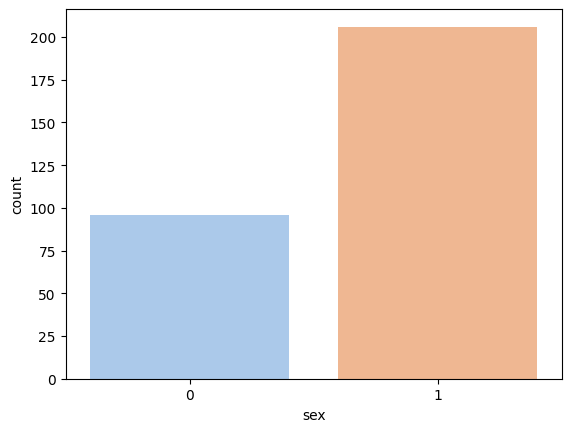

In [7]:
ax=plt.axis()
sns.countplot(x='sex', data=data, palette='pastel')

From the diagram (bar plot), we can see that the male population is more prone to heart attacks


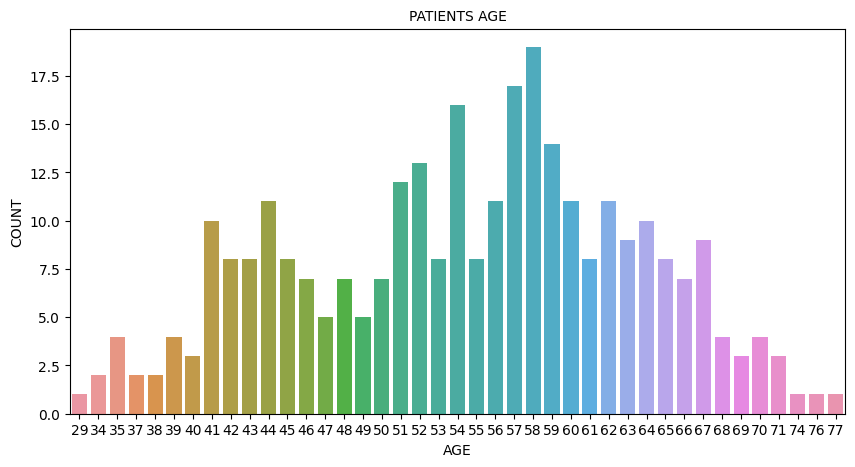

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data["age"])
plt.title("PATIENTS AGE", fontsize=10)
plt.xlabel("AGE", fontsize=10)
plt.ylabel("COUNT", fontsize=10)
plt.show()

Based on the data, we conclude that people in 58, 57 and 54 have the highest chances of getting a heart attack.


# Feature Engineering

In [9]:
#defining raw input and output
X_raw = data.iloc[:, :-1]
y_raw = data.iloc[:, -1:]

### Scaling features

In [10]:
#MinMaxScaler object
scaler = MinMaxScaler()

# Scaling the raw input features
X = scaler.fit_transform(X_raw)

#schecking what we done
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


### Label Encoder 

In [11]:
# LabelEncoder object
label_encoder = LabelEncoder()

# Encoding the y
y = label_encoder.fit_transform(y_raw.values.ravel())
# ravel() function flattens the vector.

#schecking what we done
np.unique(y, return_counts=True)

(array([0, 1]), array([138, 164]))

# Logistic Regression

### Split the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

## Logistic Regression with L2 penalty

### Defining params

In [13]:
# L2 penalty to shrink weights without removing features from the model
penalty= 'l2'
# for L2 penalty and binomial classes we will use 'liblinear'
#in case of L2 and multinomial) - 'lbfgs'
solver = 'liblinear'
# Max iteration = 1000
max_iter = 1000

### Model

In [14]:
# logistic regression model with above arguments
l2_model = LogisticRegression(random_state=123, penalty=penalty, solver=solver, max_iter=max_iter)
l2_model.fit(X_train, y_train)
l2_preds = l2_model.predict(X_test)

In [15]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.8360655737704918,
 'recall': array([0.71428571, 0.93939394]),
 'precision': array([0.90909091, 0.79487179]),
 'f1score': array([0.8       , 0.86111111])}

## Logistic Regression with L1 penalty

### Defining params

In [16]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# "saga" solver for L1 penalty and multinomial classes
# 'liblinear' for L1 and binomial
solver = 'liblinear'
# Max iteration = 1000
max_iter = 1000

### Model

In [17]:
l1_model = LogisticRegression(random_state=123, penalty=penalty, solver=solver, max_iter = 1000)
l1_model.fit(X_train, y_train)
l1_preds = l1_model.predict(X_test)

In [18]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.8360655737704918,
 'recall': array([0.71428571, 0.93939394]),
 'precision': array([0.90909091, 0.79487179]),
 'f1score': array([0.8       , 0.86111111])}

### Confusion Matrix

In [19]:
cf = confusion_matrix(y_test, l1_preds, normalize='true')

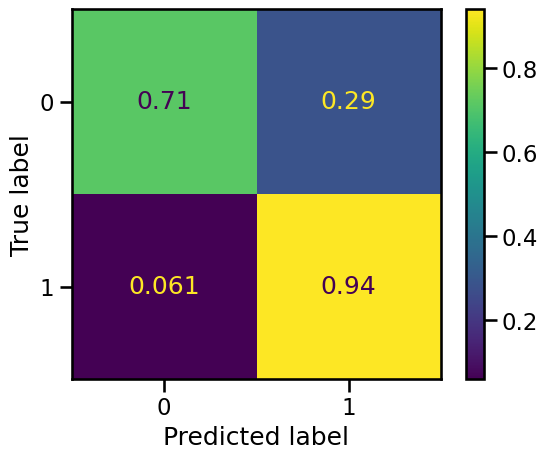

In [20]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l1_model.classes_)
disp.plot()
plt.show()

- Accuracy measures the proportion of correctly predicted instances (both true positives and true negatives) out of the total instances.
- Recall (also known as sensitivity or true positive rate) measures the proportion of actual positive instances that are correctly identified by the model.
- Precision measures the proportion of predicted positive instances that are actually positive. It indicates how precise the model is when it predicts a positive instance.
- F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.

Accuracy of 83.61% along with reasonably high recall and precision values indicates that model is performing well in both cases.